<a href="https://colab.research.google.com/github/Gayatri4-kesina/ML-Notebook/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

In [ ]:
# Load image from URL
url = 'https://fileinfo.com/img/ss/xl/jpeg_43-2.jpg'
response = requests.get(url)
image_bytes = BytesIO(response.content)
image = np.array(bytearray(image_bytes.read()), dtype=np.uint8)
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

In [ ]:
# Resize the image to reduce memory consumption (Resize by a factor of 8)
image_resized = cv2.resize(image, (image.shape[1] // 8, image.shape[0] // 8))  # Resize by a factor of 8
print("Resized Image Shape:", image_resized.shape)

Resized Image Shape: (214, 310, 3)


In [ ]:
# Check if the image was loaded correctly
if image_resized is None:
    print("Error: Unable to read the image.")
else:
    print("Image read successfully.")

Image read successfully.


In [ ]:
# Reshape image into a 2D array (each pixel is a data point)
pixels = image_resized.reshape((-1, 3))


In [ ]:
# Normalize the pixel values (optional, but helps with MiniBatchKMeans)
pixels_normalized = pixels / 255.0


In [ ]:
# Apply MiniBatchKMeans clustering (use a smaller batch size)
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, batch_size=10000, random_state=42)

In [ ]:
# Fit the model and get the labels (this happens in batches)
labels = minibatch_kmeans.fit_predict(pixels_normalized)

In [ ]:
# Create segmented image based on the labels
segmented_image = np.zeros_like(image_resized)
for i in range(len(pixels)):
    label = labels[i]
    segmented_image[i // image_resized.shape[1], i % image_resized.shape[1]] = minibatch_kmeans.cluster_centers_[label] * 255

In [ ]:
# Display the original and segmented image
plt.figure(figsize=(10, 5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

(-0.5, 309.5, 213.5, -0.5)

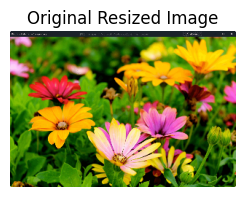

In [ ]:
# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title("Original Resized Image")
plt.axis('off')

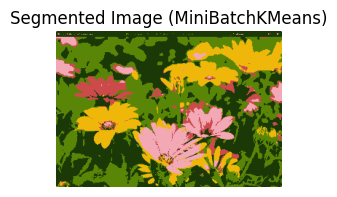

In [ ]:
# Display the segmented image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image (MiniBatchKMeans)")
plt.axis('off')

plt.show()

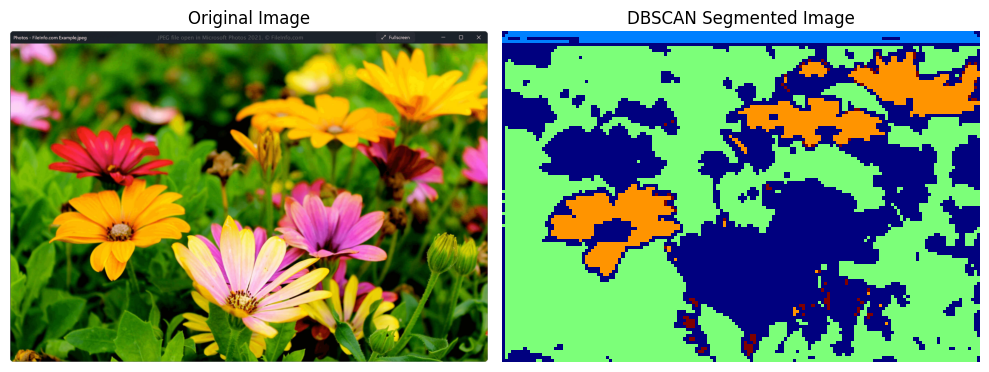

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from sklearn.cluster import DBSCAN
from PIL import Image

# URL of the image (replace with your actual URL)
image_url = 'https://fileinfo.com/img/ss/xl/jpeg_43-2.jpg'

# Fetch the image from the URL using requests
response = requests.get(image_url)

# If the request was successful, proceed to process the image
if response.status_code == 200:
    # Open the image using PIL and convert to RGB
    img_pil = Image.open(BytesIO(response.content)).convert('RGB')

    # Convert PIL image to numpy array (OpenCV uses BGR format)
    img = np.array(img_pil)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Convert the image to the LAB color space
    labimg = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # Apply pyrDown to reduce image size
    n = 0
    while n < 4:
        labimg = cv2.pyrDown(labimg)
        n += 1

    # Reshape the image for clustering (each row is a pixel, columns are LAB values)
    feature_image = np.reshape(labimg, [-1, 3])

    # Apply DBSCAN clustering on the LAB image features
    db = DBSCAN(eps=5, min_samples=50, metric='euclidean', algorithm='auto')
    db.fit(feature_image)
    labels = db.labels_

    # Reshape the labels to the image shape for visualization
    rows, cols, _ = labimg.shape
    segmented_image = np.reshape(labels, [rows, cols])

    # Plot the original and segmented images
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert back to RGB for correct display
    plt.title("Original Image")
    plt.axis('off')

    # Segmented image
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap='jet')  # Use 'jet' to visualize clusters
    plt.title("DBSCAN Segmented Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

else:
    print(f"Failed to retrieve image. HTTP Status code: {response.status_code}")